# Tweet Sentiment Classifier (Natural Language Processing - NLP)

# 1. Business Understanding

## 1.1 Business Overview

In today’s digital world, social media platforms like Twitter play a huge role in influencing how people think and feel about brands and products. Every day, thousands of users share their experiences, complaints, and compliments online. Companies such as Apple and Google rely heavily on their public image, and understanding how customers feel about their products helps them improve their marketing, product design, and customer service. By studying people’s emotions and opinions expressed in tweets, businesses can gain valuable insights into how their brands are perceived in real time.

## 1.2 Problem Statement

Apple and Google products receive huge attention on social media, but it’s difficult for businesses to keep track of what people are saying and how they feel about them. Manually reviewing thousands of tweets is time-consuming and impractical. Without a reliable way to interpret customer emotions from social media posts, companies miss opportunities to understand users, respond to concerns, and make informed business decisions. There’s a need for a system that can automatically recognize whether a tweet expresses a positive, negative, or neutral emotion toward these brands and their products.

## 1.3 Main Objective

- To build a NLP model that can rate the sentiment of a Tweet based on its content.

## 1.4 Specific Objectives

1. To clean and preprocess tweet data.
2. To identify key patterns and words commonly associated with positive or negative tweets.
3. To train and test models that can classify tweets as positive or negative.
4. To evaluate the models' performance using various metrics, such as accuracy, confusion matrix, among others.
5. To provide insights that can help Apple and Google better understand their customers’ online feedback.

## 1.5 Research questions

1. How does one clean and preprocess text tweet data?
2. Which key patterns and words are associated with positive or negative tweets?
3. How do I train and test models that will classify tweets as positive or negative?
4. Which metrics do I use to evaluate my models?
5. Which insights have I found that can help Apple and Google to understand their customers better?

## 1.6 Success metrics 

1. Analyze the confusion matrix to verify that most tweets in each sentiment class are correctly classified, confirming good model performance.
2. Ensure a high accuracy is attained about 80%.

# 2. Data Understanding

The dataset to be used is from [data.world](https://data.world/crowdflower/brands-and-product-emotions). It's on judging emotions about brands and products, in this case, specificaly, Apple and Google. A bit of EDA is also done here.

In [1]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the dataset
tweet = pd.read_csv('judge-1377884607_tweet_product_company.csv', encoding = 'latin-1')
tweet.head(10)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [3]:
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [4]:
# Check the number of rows and columns in this dataset
tweet.shape

(9093, 3)

In [5]:
# Check for missing values
tweet.isna().sum()

tweet_text                                               1
emotion_in_tweet_is_directed_at                       5802
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [6]:
# Check for any duplicates
tweet.duplicated().sum()

22

In [7]:
tweet['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

is_there_an_emotion_directed_at_a_brand_or_product
No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

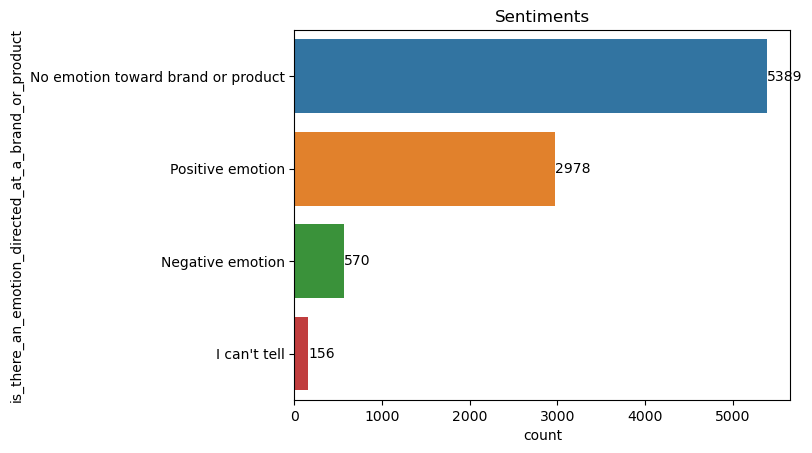

In [8]:
# Plot a countplot to check for class imbalance
figure, ax = plt.subplots()
sns.countplot(data = tweet, y = 'is_there_an_emotion_directed_at_a_brand_or_product', 
              order=tweet['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts().index)
ax.set_title('Sentiments')
ax.bar_label(ax.containers[0], label_type = 'edge');

In this column, the category `No emotion toward brand or product` leads with a total of 5389 mentions while `I can't tell` being the last with 156 mentions. 

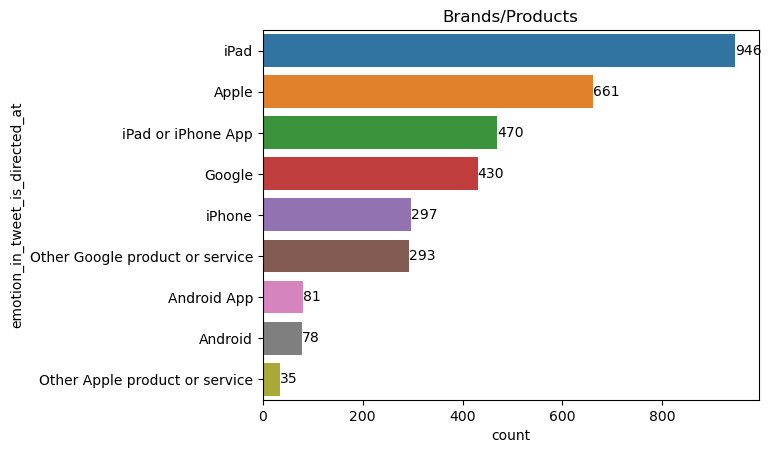

In [9]:
figure, ax = plt.subplots()
sns.countplot(data = tweet, y = 'emotion_in_tweet_is_directed_at', order=tweet['emotion_in_tweet_is_directed_at'].value_counts().index)
ax.set_title('Brands/Products')
ax.bar_label(ax.containers[0], label_type = 'edge');

The leading brand is Apple with 661, while the last brand is Google with 430. The leading product is iPad which is an Apple product with 946, while the last product is Other Apple product or service with 35.

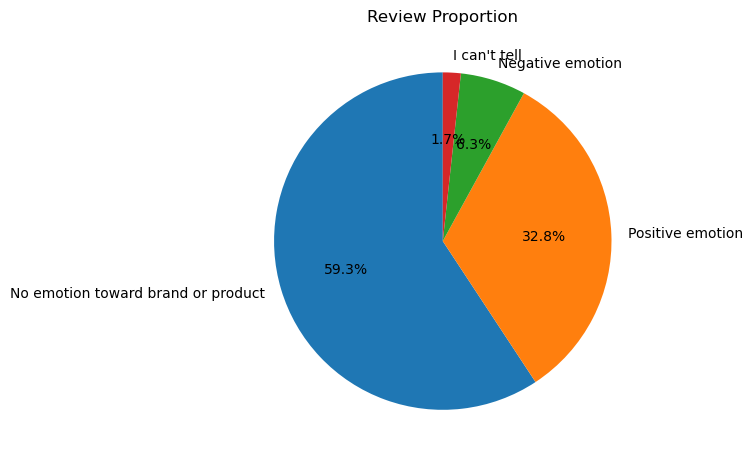

In [10]:
sentiment_counts = tweet['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()

# Visualize sentiment distribution in a pie chart
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 2)
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Review Proportion')

plt.tight_layout()
plt.show()

This is a percentage representation of the emotions of the brands or products, with the leading emotion being No emotion toward brand or product with 59.73%, while the least is I can't tell with 1.7%.

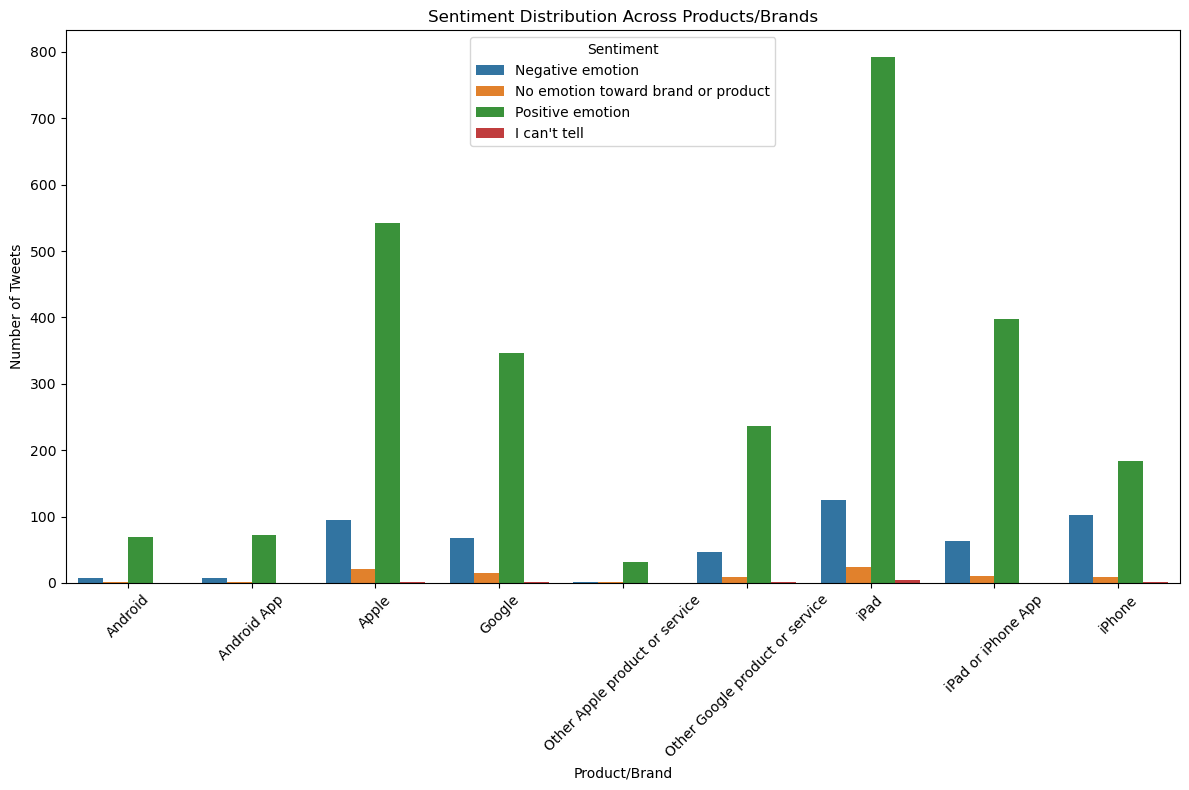

In [11]:
# Analyze relationship between brand mentions and sentiment
count_data = tweet.groupby(['emotion_in_tweet_is_directed_at', 'is_there_an_emotion_directed_at_a_brand_or_product']).size().reset_index(name='count')

plt.figure(figsize=(12, 8))
sns.barplot(data=count_data, 
            x='emotion_in_tweet_is_directed_at', 
            y='count', 
            hue='is_there_an_emotion_directed_at_a_brand_or_product')
plt.title('Sentiment Distribution Across Products/Brands')
plt.xlabel('Product/Brand')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

From the above graph, most of the products/brands have are positively viewed. iPad is the most 'rated' product.

**Observations**<br> 
The above dataset:
- Has 9093 rows and 3 columns.
- Has several missing values/data.
- Has several duplicates.
- Has no placeholders.
- Has some class imbalance in `is_there_an_emotion_directed_at_a_brand_or_product` column.
- The target column is `is_there_an_emotion_directed_at_a_brand_or_product`.
- Has the following column descriptions:
  
     **Columns**
1. `tweet_text` - Tweets by consumers of each brand and product.
2. `emotion_in_tweet_is_directed_at` - The brand/product that the tweet is referring to. 
3. `is_there_an_emotion_directed_at_a_brand_or_product` - Emotion review. Positive, negative, neutral.

# 3. Data Preparation

It consists of some data cleaning, preprocessing, feature engineering. In Natural Language Processing(NLP), some processes such as removing stop words, applying stemming and lemmatization, vectorization among other processes are done. 

Some of the libraries I've used in text preprocessing:

- `re` - Helps find and remove unwanted text patterns using regular expressions (like links or special characters).
- `nltk` - A toolkit for working with human language (text).
- `string` - Gives easy access to common string functions and symbols (like punctuation).
- `nltk.corpus.stopwords` - Provides a list of common words (like “the”, “is”) that can be removed since they add little meaning.
- `nltk.tokenize.RegexpTokenizer` - Breaks text into words using a specific rule or pattern.
- `nltk.stem.WordNetLemmatizer` - Reduces words to their base form (e.g., “running” to “run”).
- `sklearn.feature_extraction.text.TfidfVectorizer` - Converts text into numbers based on how important each word is in a document.
- `sklearn.feature_extraction.text.CountVectorizer` - Converts text into numbers by counting how many times each word appears.

Some of the resources downloaded:
- `nltk.download('punkt')` - Downloads a tool that helps split text into sentences and words.
- `nltk.download('stopwords')` - Downloads a list of common words (eg, “and”, “is”, “the”) that are usually removed from text.
- `nltk.download('wordnet')` - Downloads the WordNet database, which helps the lemmatizer find the base form of words.
- `nltk.download('omw-1.4')` - Downloads extra language data that supports WordNet for better lemmatization.

In [12]:
# Importing libraries
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [13]:
# Download necessary resources
nltk.download('punkt') 
nltk.download('stopwords') 
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## 3.1 Data cleaning

I'll first begin with handling missing values, then duplicates.

I’ve noticed that some texts in the `tweet_text` column mention the categories listed in `emotion_in_tweet_is_directed_at`. Therefore, I can fill the missing values in `emotion_in_tweet_is_directed_at` with the mentioned categories in their respective rows.

In [14]:
# Unique values in the emotion_in_tweet_is_directed_at column
categories = ['iPhone', 'iPad or iPhone App', 'iPad', 'Google', 'Android', 'Apple',
              'Android App', 'Other Google product or service', 'Other Apple product or service']

In [15]:
# Drop the missing value in tweet_text
tweet = tweet.dropna(subset=['tweet_text'])
tweet = tweet.reset_index(drop = True)
tweet.isna().sum()

tweet_text                                               0
emotion_in_tweet_is_directed_at                       5801
is_there_an_emotion_directed_at_a_brand_or_product       0
dtype: int64

In [16]:
tweet.shape

(9092, 3)

In [17]:
# Fill some of the missing values with the categories rows where the emotion_in_tweet_is_directed_at column is missing
mask = tweet['emotion_in_tweet_is_directed_at'].isna()

for cat in categories:
    # regex: whole word, optional plural 's'
    pattern = r'\b' + re.escape(cat) + r's?\b'
    # find rows that contain the category
    matches = tweet.loc[mask, 'tweet_text'].str.contains(pattern, case=False, regex=True, na=False)
    # fill the missing values with their respective category
    tweet.loc[mask & matches, 'emotion_in_tweet_is_directed_at'] = cat
    mask = tweet['emotion_in_tweet_is_directed_at'].isna()

print(tweet.isna().sum())

tweet_text                                              0
emotion_in_tweet_is_directed_at                       791
is_there_an_emotion_directed_at_a_brand_or_product      0
dtype: int64


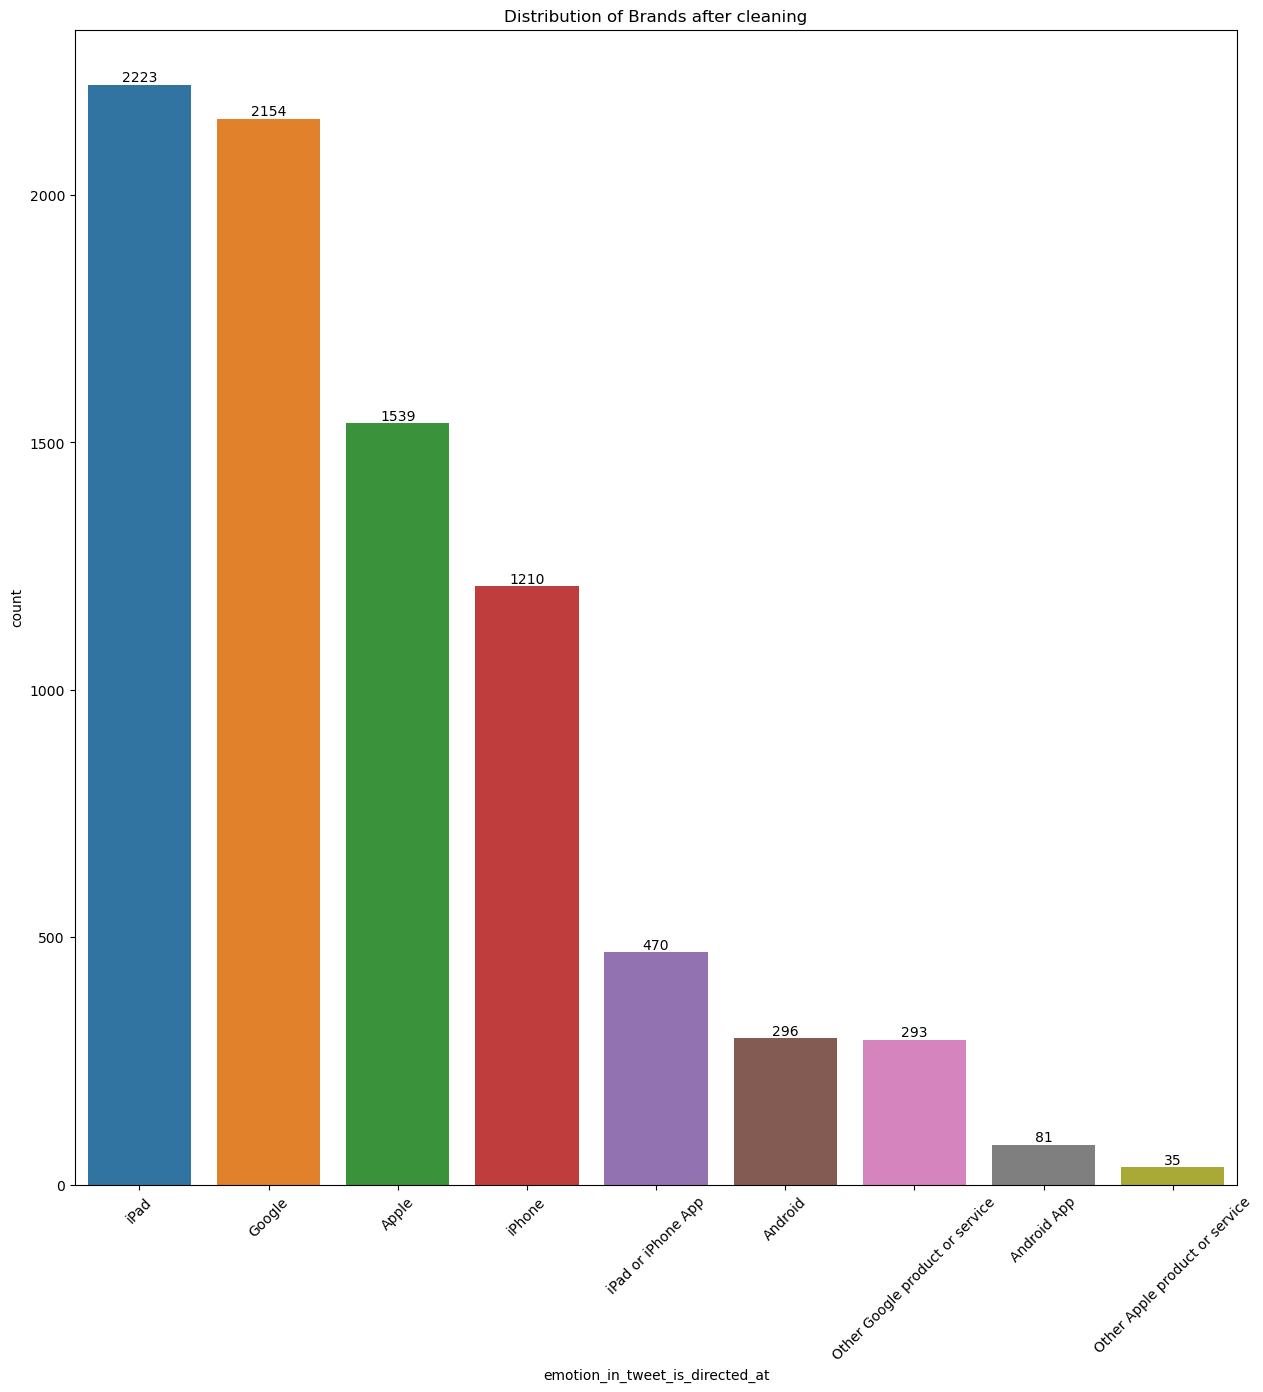

In [18]:
# Plot the current changes
figure, ax = plt.subplots(figsize = (15, 15))
sns.countplot(data = tweet, x = 'emotion_in_tweet_is_directed_at', order=tweet['emotion_in_tweet_is_directed_at'].value_counts().index)
ax.tick_params(axis = 'x', rotation = 45)
ax.set_title('Distribution of Brands after cleaning')
ax.bar_label(ax.containers[0], label_type = 'edge');

In [19]:
tweet.head(15)

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,iPad,No emotion toward brand or product
6,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
7,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
8,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
9,Excited to meet the @samsungmobileus at #sxsw ...,Android,Positive emotion


In [20]:
tweet['emotion_in_tweet_is_directed_at'].isna().mean() * 100

8.699956005279367

The missing values left are only 8.6%, so I've decided to drop them as they don't have a big impact.

In [21]:
tweet.dropna(inplace = True)
tweet.isnull().sum()

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

In [22]:
# Remove duplicates
tweet.drop_duplicates(inplace=True)

In [23]:
tweet.duplicated().sum()

0

In [24]:
# Change the column names to easier names
tweet = tweet.rename(columns = {'emotion_in_tweet_is_directed_at': 'brand_product', 'is_there_an_emotion_directed_at_a_brand_or_product':'Sentiment'})
tweet.head()

,tweet_text,brand_product,Sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


The unique values in `is_there_an_emotion_directed_at_a_brand_or_product` can be reduced to either positive, negative or neutral for better understanding. 

In [25]:
labels = {"I can't tell": 'Neutral',
         "No emotion toward brand or product": 'Neutral',
         'Positive emotion': 'Positive',
         'Negative emotion': 'Negative'}

In [26]:
tweet['Sentiment'] = tweet['Sentiment'].map(labels) 
tweet['Sentiment'].value_counts()

Sentiment
Neutral     4759
Positive    2955
Negative     567
Name: count, dtype: int64

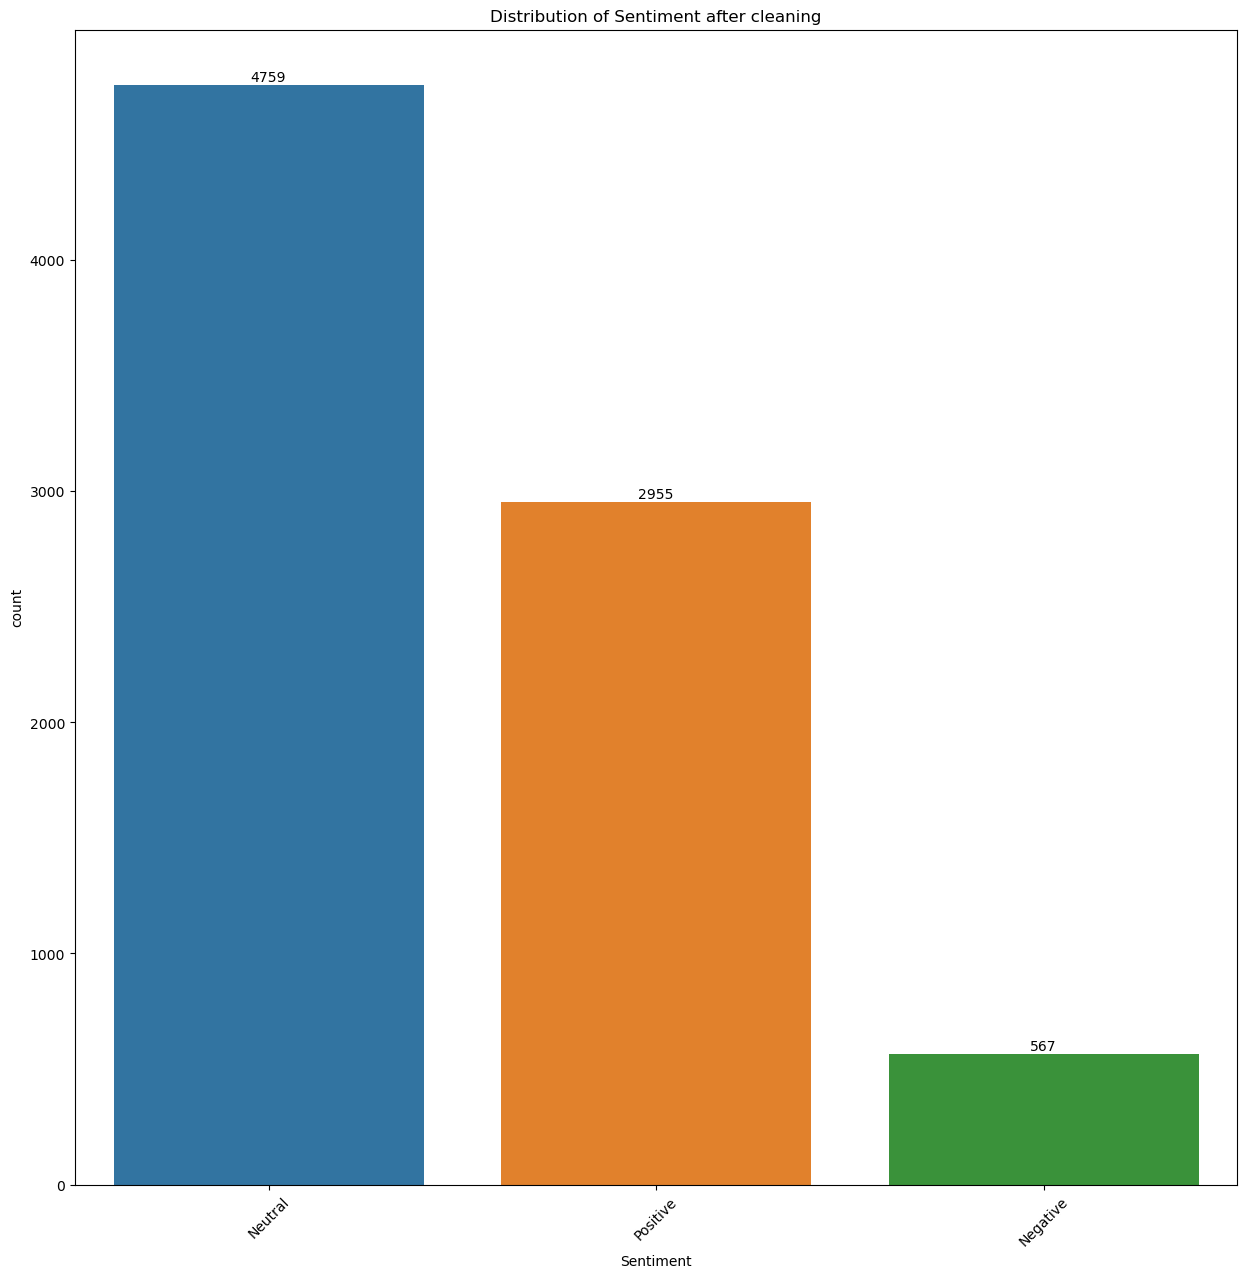

In [27]:
figure, ax = plt.subplots(figsize = (15, 15))
sns.countplot(data = tweet, x = 'Sentiment', order=tweet['Sentiment'].value_counts().index)
ax.tick_params(axis = 'x', rotation = 45)
ax.set_title('Distribution of Sentiment after cleaning')
ax.bar_label(ax.containers[0], label_type = 'edge');

## 3.2 Data/Text preprocessing

The reason why stopword removal is done is to eliminate common words like "the," "and," "but" that provide little analytical value while reducing dimensionality.Lemmatization uses linguistic mappings to reduce words to valid root forms (lemmas). 


In [28]:
# Initialize WordNetLemmatizer, RegexpTokenizer
lemmatizer = WordNetLemmatizer()
tokenizer = RegexpTokenizer(r'\b[a-zA-Z]+\b')

# Create a list of stopwords
stop_words = stopwords.words('english')

In [29]:
# Do basic cleaning, removal of URLs, removal of stopwords, etc
def cleaning_text(text, lemmatizer, tokenizer, stop_words):
    text = text.lower()
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    # Split text to tokens
    tokens = tokenizer.tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization
    lemmatized_words = [lemmatizer.lemmatize(word) for word in tokens]
    # Join the tokens to a sentence
    clean_text = ' '.join(lemmatized_words)

    return clean_text

cleaning_text("@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd", lemmatizer, tokenizer, stop_words)

'new ipad apps communication showcased conference'

In [30]:
tweet['cleaned_text'] = tweet['tweet_text'].apply(
    lambda x:cleaning_text(x, lemmatizer, tokenizer, stop_words))

# Showing examples
for i in range(3):
    print(f"Before: {tweet['tweet_text'].iloc[i][:80]}...")
    print(f"After:  {tweet['cleaned_text'].iloc[i][:80]}...")
    print()

Before: .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead...
After:  iphone hr tweeting dead need upgrade plugin station...

Before: @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appre...
After:  know awesome ipad iphone app likely appreciate design also giving free t...

Before: @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW....
After:  wait also sale...



In [31]:
tweet = tweet[[tweet.columns[-1]] + tweet.columns[:-1].tolist()]
tweet.head()              

,cleaned_text,tweet_text,brand_product,Sentiment
0,iphone hr tweeting dead need upgrade plugin st...,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,know awesome ipad iphone app likely appreciate...,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,wait also sale,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,hope year festival crashy year iphone app,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,great stuff fri marissa mayer google tim reill...,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive


In [32]:
tweet.drop(columns = 'tweet_text', inplace = True)
tweet.head()

,cleaned_text,brand_product,Sentiment
0,iphone hr tweeting dead need upgrade plugin st...,iPhone,Negative
1,know awesome ipad iphone app likely appreciate...,iPad or iPhone App,Positive
2,wait also sale,iPad,Positive
3,hope year festival crashy year iphone app,iPad or iPhone App,Negative
4,great stuff fri marissa mayer google tim reill...,Google,Positive


In [33]:
tweet = tweet.rename(columns = {'cleaned_text': 'cleaned_tweet'})
tweet.head()

,cleaned_tweet,brand_product,Sentiment
0,iphone hr tweeting dead need upgrade plugin st...,iPhone,Negative
1,know awesome ipad iphone app likely appreciate...,iPad or iPhone App,Positive
2,wait also sale,iPad,Positive
3,hope year festival crashy year iphone app,iPad or iPhone App,Negative
4,great stuff fri marissa mayer google tim reill...,Google,Positive


Map the sentiment to a binary problem first (e.g., drop "neutral" tweets). This simplifies the initial model and makes it easier to achieve good performance. 

In [34]:
labels = {
    'Positive': 1,
    'Negative': 2,
    'Neutral': 0
}

In [35]:
tweet['Sentiment'] = tweet['Sentiment'].map(labels)
tweet['Sentiment'].value_counts()

Sentiment
0    4759
1    2955
2     567
Name: count, dtype: int64

In [36]:
# Import the necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn import svm

In [37]:
# Define the features and labels
X = tweet['cleaned_tweet']
y = tweet['Sentiment']

# Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6210,)
(2071,)
(6210,)
(2071,)


# 4. Modelling

I've decided to work with 4 models;
- Logistic Regression (baseline model):
A simple model that checks if the words in a tweet point more to positive, negative, or neutral. It's good for quick comparison.
- Random Forest:
Uses many small “decision trees” to decide sentiment based on word patterns and frequencies; handles noisy text quite well.
- XGBoost Classifier:
An advanced tree-based model that learns from its past errors. It often gives very high accuracy for text classification.
- Support Vector Machine (SVM):
Looks for the best boundary that separates tweets with different sentiments.

I'm also using pipelines to do the vectorization using the TD-IDF vectorizer and Count vectorizer. I can then compare both as I continue tuning the models.

### Using TD-IDF Vectorizer with the models

TF-IDF (Term Frequency-Inverse Document Frequency) also counts words but adjusts their importance. It reduces the weight of common words and increases the weight of rare, meaningful ones.

In [39]:
# Pipelines for the models
pipe_1 = Pipeline([
    ('Vectorizer', TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ('Logclf', LogisticRegression(random_state=42, max_iter=1000, class_weight = 'balanced'))
])

pipe_2 = Pipeline([
    ('Vectorizer', TfidfVectorizer(max_features=6000, ngram_range=(1,2))),
    ('Random', RandomForestClassifier(random_state = 42, class_weight = 'balanced'))
])


pipe_3 = Pipeline([
    ('Vectorizer', TfidfVectorizer(max_features=8000, ngram_range=(1,2))),
    ('XGBoost', XGBClassifier())
])

pipe_4 = Pipeline([
    ('Vectorizer', TfidfVectorizer(max_features = 6000, ngram_range=(1,2))),
    ('SVM', svm.SVC(class_weight = 'balanced'))
])
model_names = ['Logistic Regression', 'Random Forest',  'XGBoost Classifier', 'SVM']
pipe_list = [pipe_1, pipe_2, pipe_3, pipe_4]
# Fit all models
for name, estimator in zip(model_names, pipe_list):
    print(f"Fitting {name} ...")
    estimator.fit(X_train, y_train)

Fitting Logistic Regression ...
Fitting Random Forest ...
Fitting XGBoost Classifier ...
Fitting SVM ...


In [40]:
# Evaluate
results = {}
for name, estimator in zip(model_names, pipe_list):
    y_pred = estimator.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))


Logistic Regression Accuracy: 0.6108
              precision    recall  f1-score   support

           0       0.72      0.65      0.68      1190
           1       0.57      0.57      0.57       739
           2       0.26      0.46      0.34       142

    accuracy                           0.61      2071
   macro avg       0.52      0.56      0.53      2071
weighted avg       0.63      0.61      0.62      2071


Random Forest Accuracy: 0.6490
              precision    recall  f1-score   support

           0       0.66      0.84      0.74      1190
           1       0.62      0.43      0.51       739
           2       0.57      0.18      0.28       142

    accuracy                           0.65      2071
   macro avg       0.62      0.49      0.51      2071
weighted avg       0.64      0.65      0.63      2071


XGBoost Classifier Accuracy: 0.6625
              precision    recall  f1-score   support

           0       0.67      0.86      0.75      1190
           1       0.6

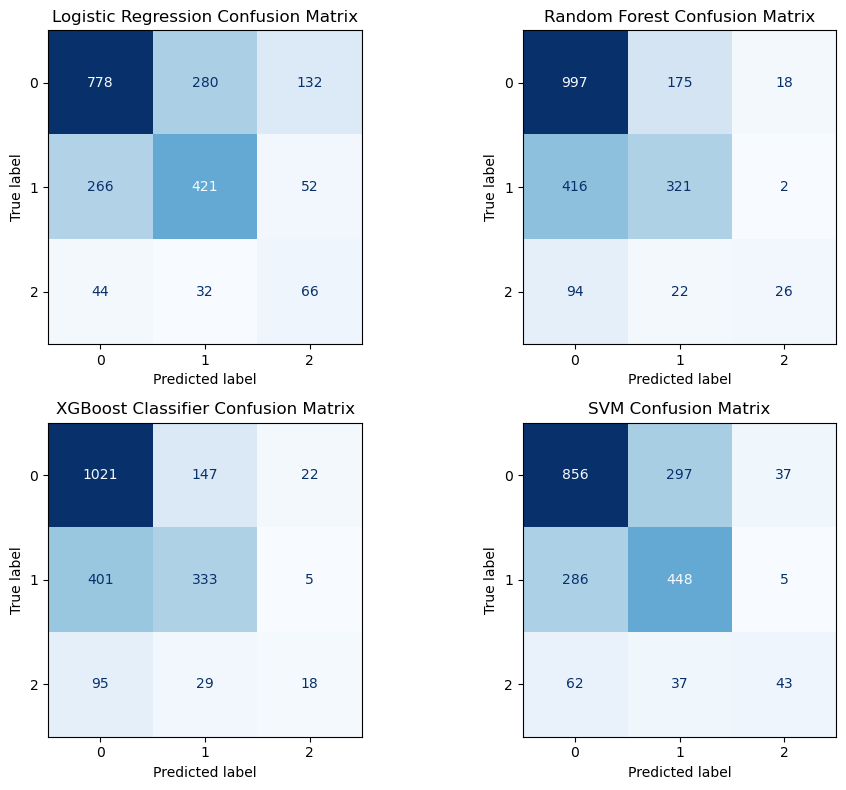

In [41]:
# Plot a confusion matrix for each model ad compare each model.
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for ax, (name, estimator) in zip(axes.flat, zip(model_names, pipe_list)):
    y_pred = estimator.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', ax=ax, colorbar=False)
    ax.set_title(f"{name} Confusion Matrix")

plt.tight_layout()
plt.show()

Even after specifying the `class_weight` to balanced, there is a huge class imbalanced as reflected by the results of the confusion matrix for each model. 

In [42]:
# Find the best model based on overall average of precision, recall, and f1-score across classes
best_score = 0
best_model_name = None
best_model = None

for name, estimator in zip(model_names, pipe_list):
    report = classification_report(y_test, estimator.predict(X_test), output_dict=True, zero_division=0)
    avg_score = (report['macro avg']['precision'] + report['macro avg']['recall'] + report['macro avg']['f1-score']) / 3
    
    if avg_score > best_score:
        best_score = avg_score
        best_model_name = name
        best_model = estimator
        best_report = report

print(f"\nBest Model Overall: {best_model_name} with Avg Precision/Recall/F1: {best_score:.4f}")
print("\nClassification Report for Best Model:")
print(classification_report(y_test, best_model.predict(X_test), zero_division=0))



Best Model Overall: SVM with Avg Precision/Recall/F1: 0.5668

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1190
           1       0.57      0.61      0.59       739
           2       0.51      0.30      0.38       142

    accuracy                           0.65      2071
   macro avg       0.60      0.54      0.56      2071
weighted avg       0.65      0.65      0.65      2071



### Using Count Vectorizer

`Count Vectorizer` changes text into numbers by counting how often each word appears in a document. It’s simple and effective for small or straightforward datasets, as it captures word frequency directly. However, it treats all words equally, so very common words like “the” or “is” can dominate and reduce the quality of results.

In [43]:
pipe1 = Pipeline([
    ('Vectorizer', CountVectorizer(max_features=5000)),
    ('Logclf', LogisticRegression(random_state=42, max_iter=1000, class_weight = 'balanced'))
])

pipe2 = Pipeline([
    ('Vectorizer', CountVectorizer(max_features=6000)),
    ('Random', RandomForestClassifier(random_state = 42, class_weight = 'balanced'))
])


pipe3 = Pipeline([
    ('Vectorizer', CountVectorizer(max_features=8000)),
    ('XGBoost', XGBClassifier())
])

pipe4 = Pipeline([
    ('Vectorizer', CountVectorizer(max_features = 6000)),
    ('SVM', svm.SVC(class_weight = 'balanced'))
])
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost Classifier', 'SVM']
pipe_list = [pipe1, pipe2, pipe3, pipe4]
# Fit all models
for name, estimator in zip(model_names, pipe_list):
    print(f"Fitting {name} ...")
    estimator.fit(X_train, y_train)

Fitting Logistic Regression ...
Fitting Random Forest ...
Fitting XGBoost Classifier ...
Fitting SVM ...


In [44]:
# Evaluate
results = {}
for name, estimator in zip(model_names, pipe_list):
    y_pred = estimator.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred, zero_division=0))


Logistic Regression Accuracy: 0.6321
              precision    recall  f1-score   support

           0       0.72      0.69      0.70      1190
           1       0.59      0.58      0.58       739
           2       0.30      0.42      0.35       142

    accuracy                           0.63      2071
   macro avg       0.53      0.56      0.55      2071
weighted avg       0.64      0.63      0.64      2071


Random Forest Accuracy: 0.6581
              precision    recall  f1-score   support

           0       0.67      0.85      0.75      1190
           1       0.64      0.45      0.53       739
           2       0.57      0.18      0.28       142

    accuracy                           0.66      2071
   macro avg       0.62      0.49      0.52      2071
weighted avg       0.65      0.66      0.64      2071


XGBoost Classifier Accuracy: 0.6678
              precision    recall  f1-score   support

           0       0.67      0.88      0.76      1190
           1       0.6

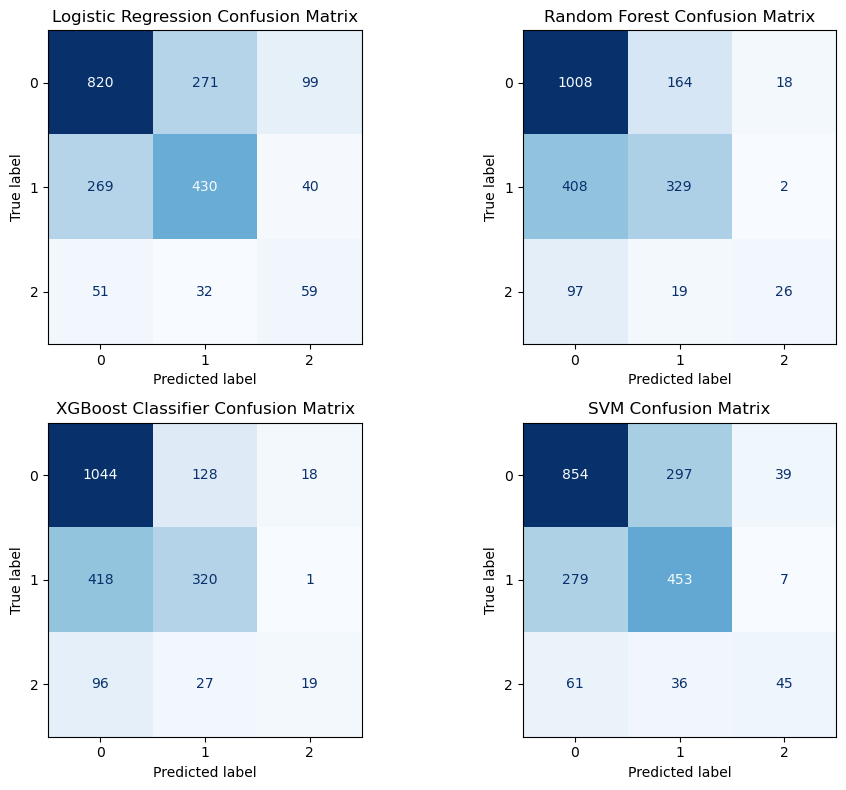

In [45]:
# Plot confusion matrices for each model
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for ax, (name, estimator) in zip(axes.flat, zip(model_names, pipe_list)):
    y_pred = estimator.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', ax=ax, colorbar=False)
    ax.set_title(f"{name} Confusion Matrix")

plt.tight_layout()
plt.show()

In [46]:
# Find the best model based on overall average of precision, recall, and f1-score across classes
best_score = 0
best_model_name = None
best_model = None

for name, estimator in zip(model_names, pipe_list):
    report = classification_report(y_test, estimator.predict(X_test), output_dict=True, zero_division=0)
    avg_score = (report['macro avg']['precision'] + report['macro avg']['recall'] + report['macro avg']['f1-score']) / 3
    
    if avg_score > best_score:
        best_score = avg_score
        best_model_name = name
        best_model = estimator
        best_report = report

print(f"\nBest Model Overall: {best_model_name} with Avg Precision/Recall/F1: {best_score:.4f}")
print("\nClassification Report for Best Model:")
print(classification_report(y_test, best_model.predict(X_test), zero_division=0))



Best Model Overall: SVM with Avg Precision/Recall/F1: 0.5700

Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.72      0.72      0.72      1190
           1       0.58      0.61      0.59       739
           2       0.49      0.32      0.39       142

    accuracy                           0.65      2071
   macro avg       0.60      0.55      0.57      2071
weighted avg       0.65      0.65      0.65      2071



### Tuning the best models.
After comparing the f1 scores, precision and recall, the best models are Support Vector Machine(SVM) when using TD-IDF Vectorizer and XG Boost when using a Count Vectorizer.

**Fine tuning SVM**

In [47]:
svm_grid = {
    # C: Penalty parameter.
    'SVM__C': [0.1, 1, 10, 15, 20, 100],  
    # gamma: Kernel coefficient
    'SVM__gamma': [0.01, 0.1, 1, 'scale'], 
    # kernel
    'SVM__kernel': ['rbf', 'linear'],
    'SVM__class_weight':[{0: 1, 1: 2, 2: 3},
        {0: 1, 1: 1, 2: 2},
        {0: 1, 1: 1, 1: 3},
        {0: 2, 1: 3, 2: 5}]
}

grid_search = GridSearchCV(
    estimator=pipe4, 
    param_grid=svm_grid, 
    scoring='accuracy', 
    cv=7,              
    verbose=2,          
    n_jobs=-1           
)

grid_search.fit(X_train, y_train)


# The combination that performed the best during cross-validation
print(f"Best Parameters Found: {grid_search.best_params_}")

# The average cross-validation score achieved with the best parameters
print(f"Best Cross-Validation Score: {grid_search.best_score_:.4f}")

# Evaluate the Best Model on the Test Set
best_svm = grid_search.best_estimator_

y_pred = best_svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"\nTest Set Accuracy using Best Model: {test_accuracy:.4f}")

Fitting 7 folds for each of 192 candidates, totalling 1344 fits
Best Parameters Found: {'SVM__C': 20, 'SVM__class_weight': {0: 1, 1: 1, 2: 2}, 'SVM__gamma': 0.01, 'SVM__kernel': 'rbf'}
Best Cross-Validation Score: 0.6807

Test Set Accuracy using Best Model: 0.6702


**Fine tuning XGBoost**

In [48]:
param_grid = {
    'XGBoost__max_depth': [None, 2, 5, 6, 10],
    'XGBoost__min_child_weight': [1, 2],
    'XGBoost__subsample': [0.5, 0.7],
    'XGBoost__n_estimators': [100, 200],
    'Vectorizer__max_features': [1000, 3000, 5000]
}


In [49]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=pipe_3,        
    param_grid=param_grid,
    scoring='accuracy',    
    cv=7,                   
    n_jobs=-1,            
    verbose=2,
    refit=True
)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print best results
print("Best parameters:", grid_search.best_params_)
print("Best CV score:", grid_search.best_score_)

# Evaluate on the test set
y_pred = grid_search.predict(X_test)
print("Test Results:")
print(classification_report(y_test, y_pred))

Fitting 7 folds for each of 120 candidates, totalling 840 fits
Best parameters: {'Vectorizer__max_features': 5000, 'XGBoost__max_depth': 5, 'XGBoost__min_child_weight': 1, 'XGBoost__n_estimators': 100, 'XGBoost__subsample': 0.7}
Best CV score: 0.657167051896477
Test Results:
              precision    recall  f1-score   support

           0       0.67      0.86      0.75      1190
           1       0.66      0.45      0.53       739
           2       0.38      0.13      0.19       142

    accuracy                           0.66      2071
   macro avg       0.57      0.48      0.49      2071
weighted avg       0.65      0.66      0.64      2071



**Fine tuning the random forest model**

In [50]:
grid_params = {
    'Random__n_estimators': [200, 300, 400],
    'Random__max_depth': [None, 2, 5, 7, 10, 13],
    'Vectorizer__max_features': [3000, 5000],
    'Random__class_weight': [{0: 1, 1: 2, 2: 3},
        {0: 1, 1: 1, 2: 2},
        {0: 1, 1: 1, 1: 3},
        {0: 2, 1: 3, 2: 5}]
}
grid_search = GridSearchCV(pipe_2, grid_params, cv=7, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_, grid_search.best_score_)

Fitting 7 folds for each of 144 candidates, totalling 1008 fits
{'Random__class_weight': {0: 1, 1: 1, 2: 2}, 'Random__max_depth': None, 'Random__n_estimators': 400, 'Vectorizer__max_features': 5000} 0.6687613084174527


# 5. Evaluation

**The first models using TD-IDF Vectorizer**<br>
- Logistic Regression: Did okay but not great. It got about 61% of tweets right. It often confused the different sentiments, especially the smaller class.

- Random Forest: Improved a bit (about 65% accurate) but still struggled to correctly identify some tweet types, especially the rare ones.

- XGBoost: Gave the highest accuracy (around 66%) but mostly focused on the common class and missed many of the less frequent sentiments.

- SVM: Got about 65% accuracy and did a better job recognizing all types of tweets, not just the most common ones.

- Best Model: SVM
 
SVM is the best overall because it handles the different sentiment classes more evenly. It doesn’t just perform well on one type of tweet, it understands and predicts all classes more fairly, making it the most balanced and reliable model for this text data.

**The second pipeline of models using the Count Vectorizer**<br>
- Logistic Regression:
Got about 63% accuracy. It performs decently but still mixes up some tweets, especially the smaller sentiment class.

- Random Forest:
Slightly better at 66% accuracy, but it mainly focuses on the common class and misses many of the rare ones.

- XGBoost:
Has the highest accuracy (about 67%), doing really well on the common sentiment class, but it struggles with less frequent classes (especially class 2).

- SVM:
Scored around 65% accuracy, with more balanced performance across all sentiment types. It understands both common and rare tweets fairly well.

After testing several models, the Support Vector Machine (SVM) turned out to perform the best when used with the TF-IDF Vectorizer. It reached a validation accuracy of 68% and a test accuracy of 67%, showing that it performs consistently on both seen and unseen data.

Even after tuning and comparing other models like Logistic Regression, Random Forest, and XGBoost, none managed to match the SVM’s overall balance and stability. The SVM handled the text features more effectively, making it the most reliable choice for this sentiment analysis task.

Overall, the SVM was better at understanding and separating the different tweet sentiments, even when there was an issue of class imbalance. This makes it the best model for predicting tweet sentiments in this project.

# 6. Recommendations
- Collect more data on the minority class which is the Negative sentiments.
- More fine tuning can be done.
- Use SVM to analyze tweet sentiments, with human review for unclear cases.